In [1]:
import treecorr
import h5py
import pylab as mplot
import healpy as hp
import sacc
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/051422/12300area_nside4096/TXPipe_outputs/binned_lens_catalog.hdf5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    print(f['lens'].keys())
    # Get the data
    ra = np.array(f['lens/bin_0/ra'])
    dec = np.array(f['lens/bin_0/dec'])
    w = np.array(f['lens/bin_0/weight'])

Keys: <KeysViewHDF5 ['lens', 'provenance']>
<KeysViewHDF5 ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_all']>


In [ ]:
# make delta maps

In [ ]:
scale = np.array([2., 1.5, 1.25, 1.25, 1.25])

for lensi in range(4,5):
    print(lensi)
    
    with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/051422/12300area_nside4096/TXPipe_outputs/density_maps.hdf5', "r") as f:

        # Get the data
        pix = np.array(f['maps/delta_'+str(lensi)+'/pixel']) 
        delta = np.array(f['maps/delta_'+str(lensi)+'/value'])
        
    theta, phi = hp.pix2ang(4096, pix)
    dec_pix = 90.-theta/np.pi*180
    ra_pix = phi/np.pi*180
    mask_small_area = (ra_pix<500)
    
    
    # <NN>
    kk = treecorr.KKCorrelation(nbins=20,
                                min_sep=2.5,
                                max_sep=250.0,
                                sep_units='arcmin',
                                bin_slop=0.02)

    # cat_k1 = treecorr.Catalog(ra=ra_pix[mask_small_area], dec=dec_pix[mask_small_area], k=delta[mask_small_area], ra_units='deg', dec_units='deg')
    # kk.process(cat_k1, cat_k1)

    cat_k1 = treecorr.Catalog(ra=ra_pix[mask_small_area], dec=dec_pix[mask_small_area], k=delta[mask_small_area], ra_units='deg', dec_units='deg', npatch=50)
    kk.process(cat_k1, cat_k1)
    cov_jk = kk.estimate_cov('jackknife')

    theta      = np.exp(kk.logr)
    mean       = kk.xi
    weights_kk = kk.weight
    npairs_kk  = kk.npairs

    np.savez('wtheta_'+str(lensi)+'.npz', mean=mean.copy(), cov=cov_jk.copy())

4


[('lens_0', 'lens_0'), ('lens_1', 'lens_0'), ('lens_1', 'lens_1'), ('lens_2', 'lens_0'), ('lens_2', 'lens_1'), ('lens_2', 'lens_2'), ('lens_3', 'lens_0'), ('lens_3', 'lens_1'), ('lens_3', 'lens_2'), ('lens_3', 'lens_3'), ('lens_4', 'lens_0'), ('lens_4', 'lens_1'), ('lens_4', 'lens_2'), ('lens_4', 'lens_3'), ('lens_4', 'lens_4'), ('source_0', 'lens_0'), ('source_0', 'lens_1'), ('source_0', 'lens_2'), ('source_0', 'lens_3'), ('source_0', 'lens_4'), ('source_1', 'lens_0'), ('source_1', 'lens_1'), ('source_1', 'lens_2'), ('source_1', 'lens_3'), ('source_1', 'lens_4'), ('source_2', 'lens_0'), ('source_2', 'lens_1'), ('source_2', 'lens_2'), ('source_2', 'lens_3'), ('source_2', 'lens_4'), ('source_3', 'lens_0'), ('source_3', 'lens_1'), ('source_3', 'lens_2'), ('source_3', 'lens_3'), ('source_3', 'lens_4'), ('source_4', 'lens_0'), ('source_4', 'lens_1'), ('source_4', 'lens_2'), ('source_4', 'lens_3'), ('source_4', 'lens_4'), ('source_0', 'source_0'), ('source_1', 'source_0'), ('source_1', 'sou

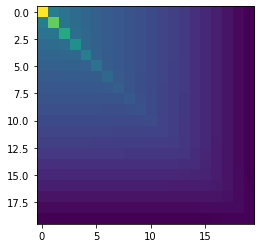

In [19]:
TXPipe_cov = sacc.Sacc.load_fits('summary_statistics_real_scaled_shot_noise.sacc')

print(TXPipe_cov.get_tracer_combinations())
mplot.imshow(TXPipe_cov.covariance.covmat[:20,:20])

fsky_all = 12300./(4*np.pi/np.pi**2*180**2)
fsky_small = len(ra_pix[mask_small_area])*1.0/hp.nside2npix(4096)

with scale cuts bin0 chi2/dof= 1.0762543179753163
without scale cuts bin0 chi2/dof= 1.836002338150583
with scale cuts bin1 chi2/dof= 0.3354583197768528
without scale cuts bin1 chi2/dof= 1.688811548874605
with scale cuts bin2 chi2/dof= 0.7019536430107773
without scale cuts bin2 chi2/dof= 1.3889778787580975
with scale cuts bin3 chi2/dof= 0.5313662362319028
without scale cuts bin3 chi2/dof= 0.9943166208699796


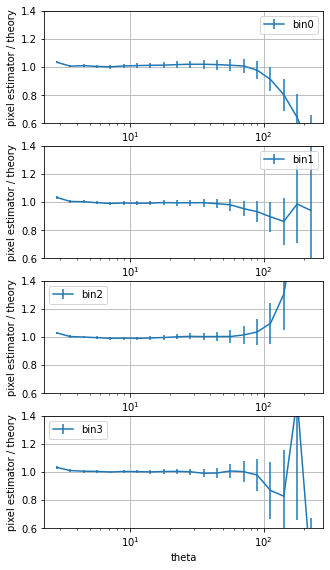

In [6]:
mplot.figure(figsize=(5,12))
scale = np.array([2., 1.5, 1.25, 1.25, 1.25])
order = np.array([0,2,5,9,14])
TXPipe_cov = sacc.Sacc.load_fits('summary_statistics_real_scaled_shot_noise.sacc')

for i in range(4):
    
    with h5py.File('/global/cfs/cdirs/lsst/groups/WL/users/jprat/gaussian_sims_srdnzs_fullsky/051422/12300area_nside4096/TXPipe_outputs/density_maps.hdf5', "r") as f:

        # Get the data
        pix2 = np.array(f['maps/delta_'+str(i)+'/pixel']) 
        
    theta2, phi2 = hp.pix2ang(4096, pix2)
    dec_pix2 = 90.-theta2/np.pi*180
    ra_pix2 = phi2/np.pi*180
    mask_small_area2 = (ra_pix2<500)
    

    fsky_all = 12300./(4*np.pi/np.pi**2*180**2)
    fsky_small = len(ra_pix2[mask_small_area2])*1.0/hp.nside2npix(4096)
    cov_ana = TXPipe_cov.covariance.covmat[20*order[i]:20*(order[i]+1),20*order[i]:20*(order[i]+1)]
    #*fsky_all/fsky_small
    #print(fsky_all/fsky_small)

    
    TXPipe = sacc.Sacc.load_fits('twopoint_theory_real.sacc')
    theta3, xi = TXPipe.get_theta_xi(
        'galaxy_density_xi',
        'lens_'+str(i),
        'lens_'+str(i))
    
    wtheta = np.load('wtheta_'+str(i)+'.npz')['mean']
    # cov = np.load('wtheta_'+str(i)+'.npz')['cov']

    mplot.subplot(5,1,i+1)
    mplot.errorbar(theta3, wtheta*scale[i]**2/xi, yerr=np.diag(cov_ana)**0.5/xi, label='bin'+str(i))
    mplot.legend()
    mplot.xscale('log')
    mplot.xlabel('theta')
    mplot.ylabel('pixel estimator / theory')
    mplot.ylim(0.6,1.4)
    mplot.grid()
    
    nn = [10,8,7,7,6]
    
    # nn = [1,1,0,0,0]
    
    chi2 = np.dot(np.dot((wtheta[nn[i]:]*scale[i]**2-xi[nn[i]:]),np.linalg.inv(cov_ana[nn[i]:,nn[i]:])),(wtheta[nn[i]:]*scale[i]**2-xi[nn[i]:]).T)
    print('with scale cuts bin'+str(i),'chi2/dof=', chi2/(20-nn[i]))

    chi2 = np.dot(np.dot((wtheta*scale[i]**2-xi),np.linalg.inv(cov_ana)),(wtheta*scale[i]**2-xi).T)
    print('without scale cuts bin'+str(i),'chi2/dof=', chi2/20)

mplot.savefig('wtheta.png')